# Preparación de datos
## Importar bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp
import re
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

## Importación de Datos 

In [2]:
df = pd.read_excel("../datasets/raw/BBDD_Hospitalizacion.xlsx", sheet_name="Datos", engine="openpyxl")

c:\Users\ozi\ti\evstack\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
print(df.shape)

(568, 20)


In [4]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3


## Explore Data

In [5]:
#df.info()
#df.columns
def limpiar_nombres_columnas(df):
    # Función para limpiar y formatear los nombres de las columnas
    def limpiar_nombre(nombre):
        # Eliminar caracteres especiales y espacios
        nombre = re.sub(r'\W+', '_', nombre)
        # Eliminar acentos
        nombre = unidecode(nombre)
        # Convertir a minúsculas
        nombre = nombre.lower()
        return nombre
    
    df.columns = [limpiar_nombre(col) for col in df.columns]

limpiar_nombres_columnas(df)
df.columns

Index(['edad', 'diabetes', 'hospitalizacion_ultimo_mes', 'psa',
       'biopsias_previas', 'volumen_prostatico',
       'antibiotico_utiliazado_en_la_profilaxis', 'numero_de_muestras_tomadas',
       'cup', 'enf_cronica_pulmonar_obstructiva', 'biopsia',
       'numero_de_dias_post_biopsia_en_que_se_presenta_la_complicacion_infecciosa',
       'fiebre', 'itu', 'tipo_de_cultivo', 'agente_aislado',
       'patron_de_resistencia', 'hospitalizacion', 'dias_hospitalizacion_mq',
       'dias_hospitalizacion_upc'],
      dtype='object')

In [6]:
df.head(15)

,edad,diabetes,hospitalizacion_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_utiliazado_en_la_profilaxis,numero_de_muestras_tomadas,cup,enf_cronica_pulmonar_obstructiva,biopsia,numero_de_dias_post_biopsia_en_que_se_presenta_la_complicacion_infecciosa,fiebre,itu,tipo_de_cultivo,agente_aislado,patron_de_resistencia,hospitalizacion,dias_hospitalizacion_mq,dias_hospitalizacion_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
5,55,SI,SI,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3,0
6,53,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3,0
7,67,NO,NO,6.2,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2,0
8,69,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4,0
9,44,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   edad                                                                       568 non-null    int64  
 1   diabetes                                                                   568 non-null    object 
 2   hospitalizacion_ultimo_mes                                                 568 non-null    object 
 3   psa                                                                        564 non-null    float64
 4   biopsias_previas                                                           566 non-null    object 
 5   volumen_prostatico                                                         567 non-null    object 
 6   antibiotico_utiliazado_en_la_profilaxis                   

- Contexto de análisis

| Grupo de Variables                                  | Variable                                                 | Detalle                                                                                                              |
|------------------------------------------------------|----------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| Antecedentes del paciente                             | EDAD                                                     | Edad del paciente                                                                                                    |
|                                                      | DIABETES                                                 | Indica si el paciente tiene o no diabetes                                                                            |
|                                                      | HOSPITALIZACIÓN ULTIMO MES                              | Indica si el paciente fue hospitalizado el mes previo al procedimiento                                               |
| Morbilidad asociada al paciente                        | CUP                                                      | Uso de catéter urinario al momento de la biopsia                                                                     |
| Antecedentes relacionados con la toma de la biopsia    | ENF. CRONICA PULMONAR OBSTRUCTIVA                       | Indica si el paciente tiene una enfermedad crónica pulmonar obstructiva                                                |
|                                                      | VOLUMEN PROSTATICO                                       | Indica si el volumen prostático es mayor a 40 cm3                                                                    |
|                                                      | PSA                                                      | Concentración del PSA en la sangre                                                                                    |
|                                                      | BIOPSIAS PREVIAS                                         | Indica si el paciente ha tenido biopsias previas                                                                     |
|                                                      | ANTIBIOTICO UTILIZADO EN LA PROFILAXIS                  | Indica el tipo de antibiótico utilizado en la profilaxis                                                              |
|                                                      | NUMERO DE MUESTRAS TOMADAS                               | Número de muestras tomadas en la biopsia                                                                             |
| Complicaciones Infecciosas                             | BIOPSIA                                                  | Resultado de la biopsia                                                                                             |
|                                                      | NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA | Indica el tiempo en el que se presenta la complicación infecciosa, con un máximo de 30 días                         |
|                                                      | FIEBRE                                                   | Indica si el paciente presenta fiebre                                                                               |
|                                                      | ITU                                                      | Indica si el paciente presenta infección de tracto urinario                                                          |
|                                                      | TIPO DE CULTIVO                                          | Tipo de cultivo encontrado                                                                                            |
|                                                      | AGENTE AISLADO                                           | Tipo de agente aislado                                                                                                |
|                                                      | PATRON DE RESISTENCIA                                    | Indica si presenta algún patrón de resistencia                                                                       |
| HOSPITALIZACION                                      | HOSPITALIZACION                                          | Indica si el paciente fue hospitalizado luego del procedimiento                                                       |
|                                                      | DIAS HOSPITALIZACION MQ                                  | Indica los días de hospitalización médico quirúrgico                                                                 |
|                                                      | DIAS HOSPITALIZACIÓN UPC                                 | Indica los días de hospitalización en estado crítico                                                                 |


In [8]:
df.describe()

,edad,psa,numero_de_muestras_tomadas,dias_hospitalizacion_mq,dias_hospitalizacion_upc
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [9]:
for column in df.columns:
    print(f"Valores únicos en '{column}':")
    print(df[column].unique()[:5])
    print("="*30)

Valores únicos en 'edad':
[53 56 57 55 67]
Valores únicos en 'diabetes':
['NO' 'SI']
Valores únicos en 'hospitalizacion_ultimo_mes':
['NO' 'SI']
Valores únicos en 'psa':
[ 4.   7.7 29.   7.   6.2]
Valores únicos en 'biopsias_previas':
['NO' 'SI' nan]
Valores únicos en 'volumen_prostatico':
['SI' 'NO' nan]
Valores únicos en 'antibiotico_utiliazado_en_la_profilaxis':
['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'FLUOROQUINOLONA_AMINOGLICÓSIDO' 'OTROS']
Valores únicos en 'numero_de_muestras_tomadas':
[12 24 18  6 16]
Valores únicos en 'cup':
['NO' 'SI' nan]
Valores únicos en 'enf_cronica_pulmonar_obstructiva':
['NO' 'SI, EPOC' 'SI, ASMA' 'SI' nan]
Valores únicos en 'biopsia':
['NEG' 'ADENOCARCINOMA GLEASON 6 ' 'ADENOCARCINOMA GLEASON 7 '
 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 10 ']
Valores únicos en 'numero_de_dias_post_biopsia_en_que_se_presenta_la_complicacion_infecciosa':
[1 2 3 5 9]
Valores únicos en 'fiebre':
['SI' 'NO']
Valores único

In [10]:
def calcular_moda_y_contar(dataframe):
    # Método para calcular la moda y el conteo de cada columna

    modas = dataframe.apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)
    conteo_modas = dataframe.apply(lambda x: x.value_counts().idxmax() if len(x.value_counts()) > 0 else None)
    conteo_frecuencia = dataframe.apply(lambda x: x.value_counts().max() if len(x.value_counts()) > 0 else None)
    
    resultado = pd.DataFrame({'Moda': modas, 'Valor Más Frecuente': conteo_modas, 'Frecuencia': conteo_frecuencia})
    
    return resultado

moda_y_conteo_por_columna = calcular_moda_y_contar(df)

print("Moda y frecuencia de cada columna:")
moda_y_conteo_por_columna

Moda y frecuencia de cada columna:


,Moda,Valor Más Frecuente,Frecuencia
edad,69,69,39
diabetes,NO,NO,505
hospitalizacion_ultimo_mes,NO,NO,563
psa,6.0,6.0,31
biopsias_previas,NO,NO,510
volumen_prostatico,SI,SI,408
antibiotico_utiliazado_en_la_profilaxis,FLUOROQUINOLONA_AMINOGLICOSIDO,FLUOROQUINOLONA_AMINOGLICOSIDO,448
numero_de_muestras_tomadas,12,12,432
cup,NO,NO,563
enf_cronica_pulmonar_obstructiva,NO,NO,546


### Hallazgos de Sets de datos sin cambios
1. **Antecedentes del paciente:**
   - **Edad:** La edad promedio de los pacientes es de aproximadamente 63.88 años, con una moda de 69 años, indicando que la mayoría de los pacientes tiende a tener alrededor de 69 años. Se observa un valor atípico de 151 años que puede requerir una revisión.
   - **Diabetes:** La mayoría de los pacientes (505) no tiene diabetes, siendo "NO" la moda y el valor más frecuente.
   - **Hospitalización Último Mes:** La mayoría de los pacientes (563) no fue hospitalizada en el mes previo al procedimiento, siendo "NO" la moda y el valor más frecuente.

2. **Morbilidad asociada al paciente:**
   - **CUP (Uso de catéter urinario):** La mayoría de los pacientes (563) no usa catéter urinario al momento de la biopsia, siendo "NO" la moda y el valor más frecuente.

3. **Antecedentes relacionados con la toma de la biopsia:**
   - **Enf. Crónica Pulmonar Obstructiva:** La mayoría de los pacientes (546) no tiene enfermedad crónica pulmonar obstructiva, siendo "NO" la moda y el valor más frecuente.
   - **Volumen Prostático:** La mayoría de los pacientes (408) tiene un volumen prostático mayor a 40 cm3, siendo "SI" la moda y el valor más frecuente.
   - **PSA (Concentración):** La concentración promedio de PSA es de aproximadamente 13.27, con una moda de 6.0 y una frecuencia de 31, indicando que una concentración de 6.0 es común en la muestra.
   - **Antibiótico Utilizado en la Profilaxis:** El antibiótico más comúnmente utilizado en la profilaxis es "FLUOROQUINOLONA_AMINOGLICOSIDO", con una frecuencia de 448.
   - **Número de Muestras Tomadas:** La mayoría de las biopsias toma 12 muestras, siendo 12 la moda y el valor más frecuente.

4. **Complicaciones Infecciosas:**
   - **Biopsia:** La mayoría de los pacientes (510) no ha tenido biopsias previas, siendo "NO" la moda y el valor más frecuente.
   - **Días Post Biopsia:** El tiempo promedio de presentación de complicaciones infecciosas es de aproximadamente 0.17 días, con un máximo de 30 días. Se deben analizar casos con tiempos mayores a 30 días.
   - **Fiebre:** La mayoría de los pacientes (531) no presenta fiebre, siendo "NO" la moda y el valor más frecuente.
   - **ITU:** La mayoría de los pacientes (562) no presenta infección de tracto urinario, siendo "NO" la moda y el valor más frecuente.

5. **Hospitalización:**
   - **Días Hospitalización MQ y UPC:** La mayoría de los pacientes no requiere hospitalización. Se deben analizar los pocos casos que han sido hospitalizados.


In [11]:
df.rename(columns={'numero_de_dias_post_biopsia_en_que_se_presenta_la_complicacion_infecciosa': 'n_post_biopsia'}, inplace=True)

In [12]:
def contar_valores_nulos(df):
    nulos = df.isnull().sum()
    ceros = (df == 0).astype(int).sum()

    # Aplicar sum() a todas las columnas
    nan = df.apply(lambda x: sum(pd.isna(x)))

    resultados = pd.DataFrame({'Nulos': nulos, 'Ceros': ceros, 'NaN': nan})
    
    return resultados

resultados_conteo = contar_valores_nulos(df)

print(resultados_conteo)


                                         Nulos  Ceros  NaN
edad                                         0      0    0
diabetes                                     0      0    0
hospitalizacion_ultimo_mes                   0      0    0
psa                                          4      0    4
biopsias_previas                             2      0    2
volumen_prostatico                           1      0    1
antibiotico_utiliazado_en_la_profilaxis      0      0    0
numero_de_muestras_tomadas                   0      0    0
cup                                          1      0    1
enf_cronica_pulmonar_obstructiva             2      0    2
biopsia                                      0      0    0
n_post_biopsia                               0      0    0
fiebre                                       0      0    0
itu                                          0      0    0
tipo_de_cultivo                              0      0    0
agente_aislado                              17      0   

In [13]:
df.head(15)

,edad,diabetes,hospitalizacion_ultimo_mes,psa,biopsias_previas,volumen_prostatico,antibiotico_utiliazado_en_la_profilaxis,numero_de_muestras_tomadas,cup,enf_cronica_pulmonar_obstructiva,biopsia,n_post_biopsia,fiebre,itu,tipo_de_cultivo,agente_aislado,patron_de_resistencia,hospitalizacion,dias_hospitalizacion_mq,dias_hospitalizacion_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
5,55,SI,SI,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3,0
6,53,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3,0
7,67,NO,NO,6.2,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2,0
8,69,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4,0
9,44,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3,0


<Axes: >

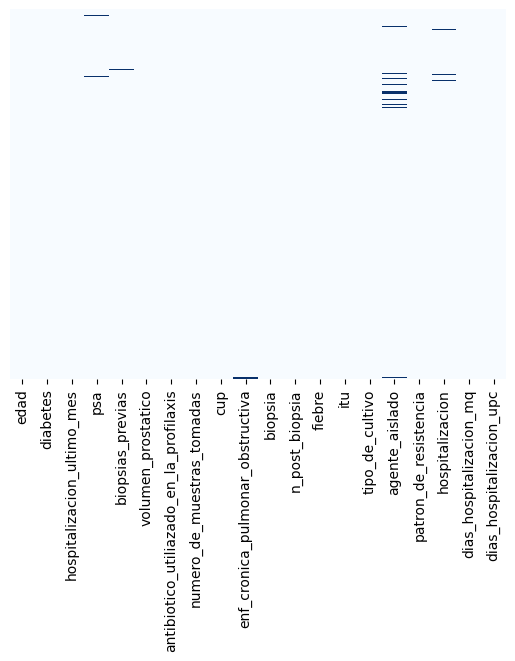

In [14]:
%matplotlib inline
# Veamos si nos faltan datos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'psa'}>],
       [<Axes: title={'center': 'numero_de_muestras_tomadas'}>,
        <Axes: title={'center': 'dias_hospitalizacion_mq'}>],
       [<Axes: title={'center': 'dias_hospitalizacion_upc'}>, <Axes: >]],
      dtype=object)

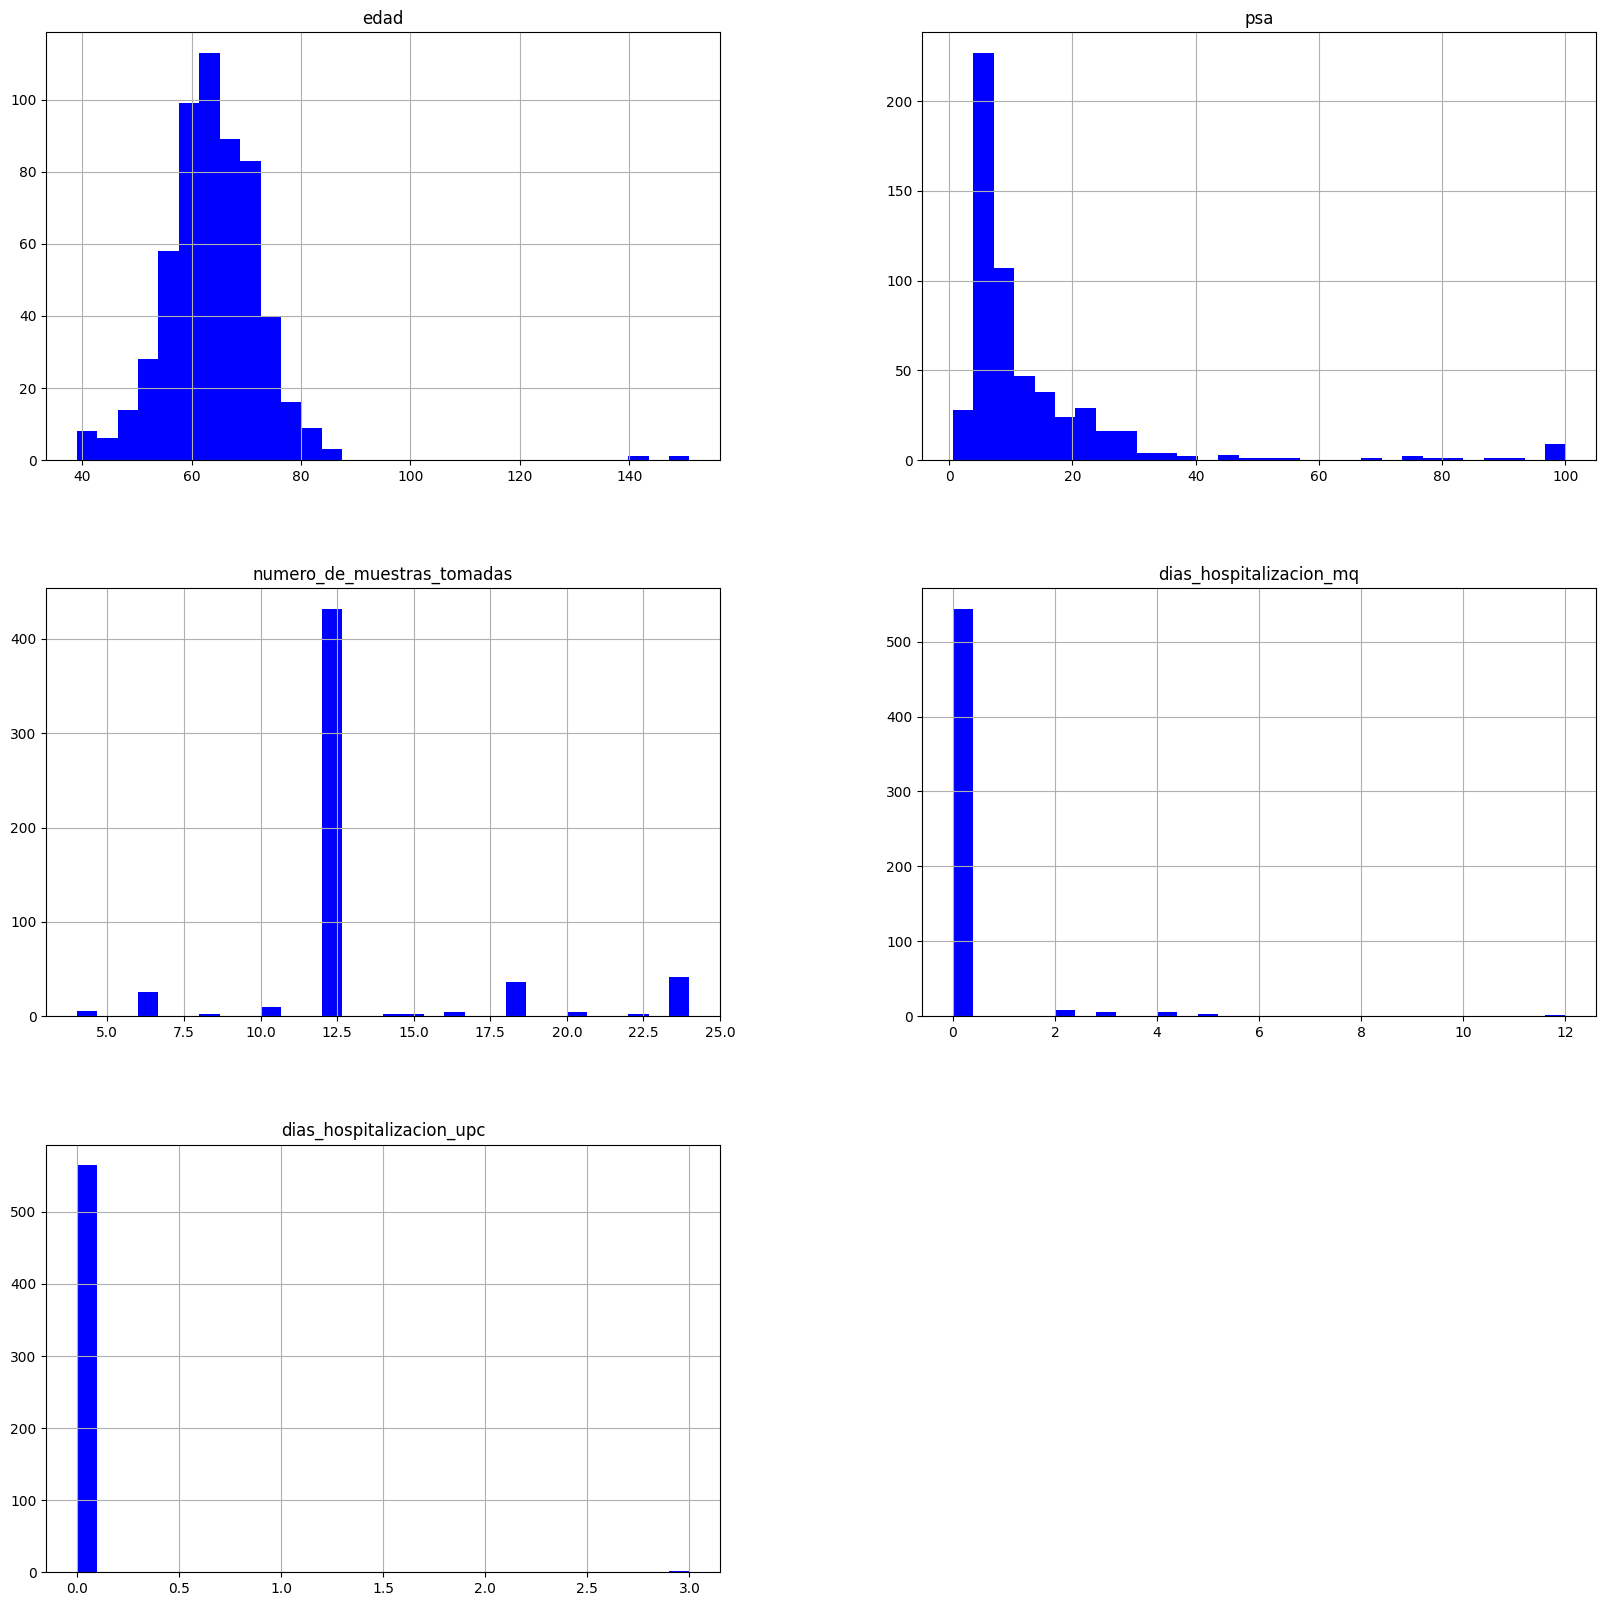

In [15]:
%matplotlib inline
df.hist(bins = 30, figsize = (20,20), color = 'blue')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   edad                                     568 non-null    int64  
 1   diabetes                                 568 non-null    object 
 2   hospitalizacion_ultimo_mes               568 non-null    object 
 3   psa                                      564 non-null    float64
 4   biopsias_previas                         566 non-null    object 
 5   volumen_prostatico                       567 non-null    object 
 6   antibiotico_utiliazado_en_la_profilaxis  568 non-null    object 
 7   numero_de_muestras_tomadas               568 non-null    int64  
 8   cup                                      567 non-null    object 
 9   enf_cronica_pulmonar_obstructiva         566 non-null    object 
 10  biopsia                                  568 non-n

In [17]:

# Obtener las columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[categorical_columns] = df[categorical_columns].astype(str)

# Definir las transformaciones para las columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Definir las transformaciones para las columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crear la columna transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Crear la pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


transformed_df = pipeline.fit_transform(df)

In [18]:
transformed_df

array([[-1.17347567, -0.59432636, -0.25435133, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84996773, -0.35714456, -0.25435133, ...,  0.        ,
         1.        ,  0.        ],
       [-0.74213176,  1.00825338,  2.8086498 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.55189998, -0.56676199,  1.78764943, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.33622802, -0.3379136 , -0.25435133, ...,  1.        ,
         0.        ,  0.        ],
       [-0.5264598 , -0.27381041, -0.25435133, ...,  1.        ,
         0.        ,  0.        ]])

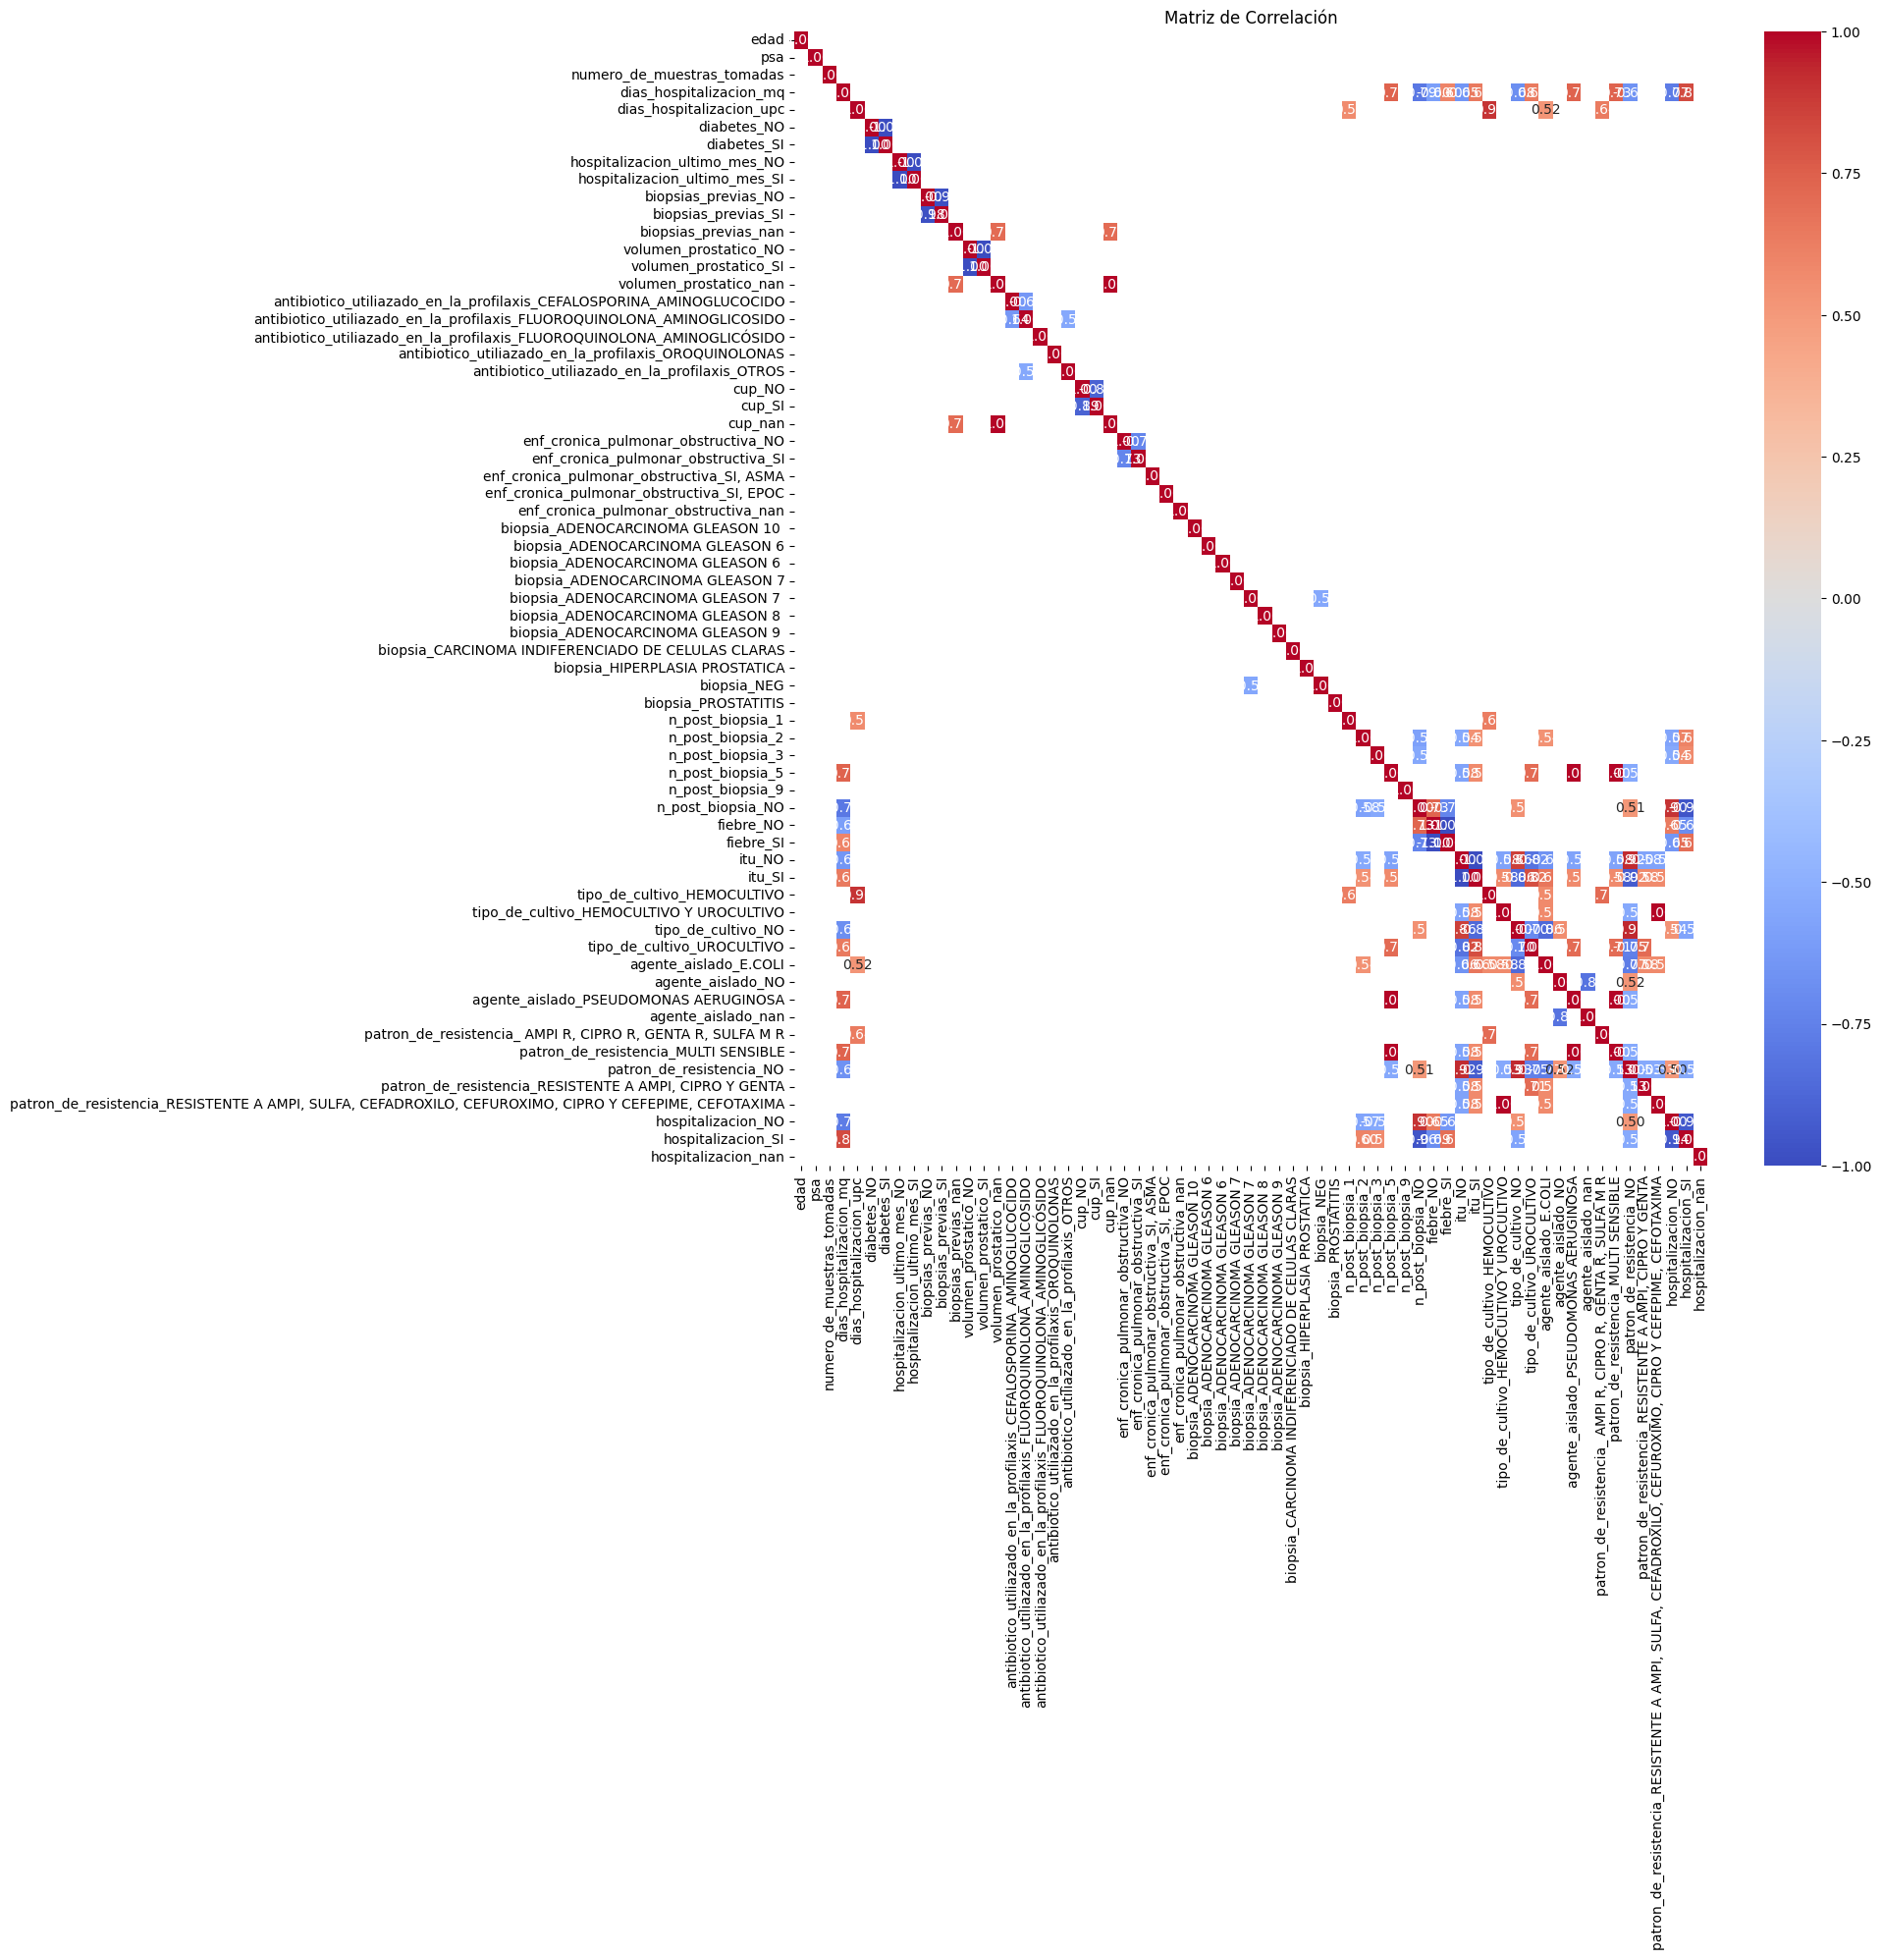

In [19]:
%matplotlib inline
# Obtener las columnas numéricas y categóricas después de la transformación
numeric_columns_transformed = pipeline.named_steps['preprocessor'].transformers_[0][1]['scaler'].get_feature_names_out(input_features=numeric_columns)
categorical_columns_transformed = pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(input_features=categorical_columns)

# Unir los nombres de las columnas numéricas y categóricas después de la transformación
all_columns_transformed = np.concatenate([numeric_columns_transformed, categorical_columns_transformed])

# Convertir el array transformado a un DataFrame con los nuevos nombres de columnas
transformed_df = pd.DataFrame(transformed_df, columns=all_columns_transformed)

# Calcular la matriz de correlación
correlations = transformed_df.corr()

# Definir un umbral para la correlación
threshold = 0.5  

relevant_correlations = correlations[correlations.abs() > threshold]

plt.figure(figsize=(15, 15))
sns.heatmap(relevant_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

### Marco Teórico:

En este estudio, nos proponemos evaluar la relación entre diversas variables clínicas y la indicación de biopsias prostáticas. Utilizaremos técnicas estadísticas de Aprendizaje Automático para analizar los datos recopilados y derivar conclusiones sobre la asociación de estas variables con la necesidad de biopsias.

### Hipótesis Nula (H0) y Hipótesis Alternativa (H1):

1. **Edad:**
   - **H0:** No hay efecto significativo de la edad en la probabilidad de indicación de biopsias prostáticas (β₁ = 0).
   - **H1:** Existe una relación significativa entre la edad y la probabilidad de indicación de biopsias prostáticas (β₁ ≠ 0).

2. **Diabetes:**
   - **H0:** La presencia de diabetes no afecta la probabilidad de indicación de biopsias prostáticas (β₂ = 0).
   - **H1:** La presencia de diabetes tiene un efecto significativo en la probabilidad de indicación de biopsias prostáticas (β₂ ≠ 0).

3. **Hospitalización Último Mes:**
   - **H0:** La hospitalización reciente no está asociada con un aumento significativo en la probabilidad de indicación de biopsias prostáticas (β₃ = 0).
   - **H1:** La hospitalización reciente aumenta significativamente la probabilidad de indicación de biopsias prostáticas (β₃ ≠ 0).

4. **CUP (Uso de catéter urinario):**
   - **H0:** El uso de catéter urinario no está relacionado con la probabilidad de indicación de biopsias prostáticas (β₄ = 0).
   - **H1:** La falta de uso de catéter urinario está asociada con una disminución significativa en la probabilidad de indicación de biopsias prostáticas (β₄ ≠ 0).

5. **Enf. Crónica Pulmonar Obstructiva:**
   - **H0:** La presencia de enfermedad crónica pulmonar obstructiva no tiene un efecto significativo en la probabilidad de indicación de biopsias prostáticas (β₅ = 0).
   - **H1:** La presencia de enfermedad crónica pulmonar obstructiva aumenta significativamente la probabilidad de indicación de biopsias prostáticas (β₅ ≠ 0).

6. **Volumen Prostático:**
   - **H0:** El volumen prostático no afecta significativamente la probabilidad de indicación de biopsias prostáticas (β₆ = 0).
   - **H1:** Un volumen prostático superior a 40 cm3 aumenta significativamente la probabilidad de indicación de biopsias prostáticas (β₆ ≠ 0).

7. **PSA (Concentración):**
   - **H0:** La concentración de PSA no está asociada significativamente con la probabilidad de indicación de biopsias prostáticas (β₇ = 0).
   - **H1:** Diferentes niveles de concentración de PSA tienen un impacto significativo en la probabilidad de indicación de biopsias prostáticas (β₇ ≠ 0).

8. **Antibiótico Utilizado en la Profilaxis:**
   - **H0:** La elección del antibiótico no tiene un efecto significativo en la probabilidad de indicación de biopsias prostáticas (β₈ = 0).
   - **H1:** La elección del antibiótico afecta significativamente la probabilidad de indicación de biopsias prostáticas (β₈ ≠ 0).

9. **Número de Muestras Tomadas:**
   - **H0:** El número de muestras tomadas no influye significativamente en la probabilidad de indicación de biopsias prostáticas (β₉ = 0).
   - **H1:** Un mayor número de muestras tomadas se asocia significativamente con un aumento en la probabilidad de indicación de biopsias prostáticas (β₉ ≠ 0).

10. **Complicaciones Infecciosas:**
    - **H0:** Los resultados de biopsias previas no tienen un impacto significativo en la probabilidad de complicaciones infecciosas (β₁₀ = 0).
    - **H1:** Los resultados de biopsias previas aumentan significativamente la probabilidad de complicaciones infecciosas (β₁₀ ≠ 0).

### Consideraciones Adicionales:

- **Variables Dependientes e Independientes:**
  - **Variable Dependiente:** Indicación de biopsias prostáticas.
  - **Variables Independientes:** Edad, presencia de diabetes, hospitalización último mes, uso de catéter urinario, enfermedad crónica pulmonar obstructiva, volumen prostático, concentración de PSA, antibiótico utilizado en la profilaxis, número de muestras tomadas, complicaciones infecciosas.

Este enfoque incorpora pruebas de hipótesis formales y coeficientes de regresión que permiten cuantificar el impacto relativo de cada variable en la probabilidad de indicación de biopsias prostáticas.

In [20]:
transformed_df.head(15)

,edad,psa,numero_de_muestras_tomadas,dias_hospitalizacion_mq,dias_hospitalizacion_upc,diabetes_NO,diabetes_SI,hospitalizacion_ultimo_mes_NO,hospitalizacion_ultimo_mes_SI,biopsias_previas_NO,...,agente_aislado_PSEUDOMONAS AERUGINOSA,agente_aislado_nan,"patron_de_resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patron_de_resistencia_MULTI SENSIBLE,patron_de_resistencia_NO,"patron_de_resistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patron_de_resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",hospitalizacion_NO,hospitalizacion_SI,hospitalizacion_nan
0,-1.173476,-0.594326,-0.254351,1.916491,-0.071750,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.849968,-0.357145,-0.254351,5.050560,-0.071750,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.742132,1.008253,2.808650,4.005870,15.210915,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.849968,-0.402017,-0.254351,5.050560,-0.071750,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.957804,1.008253,2.808650,4.005870,15.210915,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,-0.957804,-0.594326,-0.254351,2.961180,-0.071750,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,-1.173476,-0.402017,-0.254351,2.961180,-0.071750,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.336228,-0.453299,-0.254351,1.916491,-0.071750,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.551900,-0.466120,-0.254351,4.005870,-0.071750,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,-2.143999,0.000000,-0.254351,2.961180,-0.071750,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
transformed_df.columns

Index(['edad', 'psa', 'numero_de_muestras_tomadas', 'dias_hospitalizacion_mq',
       'dias_hospitalizacion_upc', 'diabetes_NO', 'diabetes_SI',
       'hospitalizacion_ultimo_mes_NO', 'hospitalizacion_ultimo_mes_SI',
       'biopsias_previas_NO', 'biopsias_previas_SI', 'biopsias_previas_nan',
       'volumen_prostatico_NO', 'volumen_prostatico_SI',
       'volumen_prostatico_nan',
       'antibiotico_utiliazado_en_la_profilaxis_CEFALOSPORINA_AMINOGLUCOCIDO',
       'antibiotico_utiliazado_en_la_profilaxis_FLUOROQUINOLONA_AMINOGLICOSIDO',
       'antibiotico_utiliazado_en_la_profilaxis_FLUOROQUINOLONA_AMINOGLICÓSIDO',
       'antibiotico_utiliazado_en_la_profilaxis_OROQUINOLONAS',
       'antibiotico_utiliazado_en_la_profilaxis_OTROS', 'cup_NO', 'cup_SI',
       'cup_nan', 'enf_cronica_pulmonar_obstructiva_NO',
       'enf_cronica_pulmonar_obstructiva_SI',
       'enf_cronica_pulmonar_obstructiva_SI, ASMA',
       'enf_cronica_pulmonar_obstructiva_SI, EPOC',
       'enf_cronica_pulmonar

C:\Users\ozi\AppData\Local\Temp\ipykernel_15428\410684469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primer_grupo['variable'] = df_primer_grupo[['biopsias_previas_NO', 'biopsias_previas_SI', 'biopsias_previas_nan']].idxmax(axis=1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


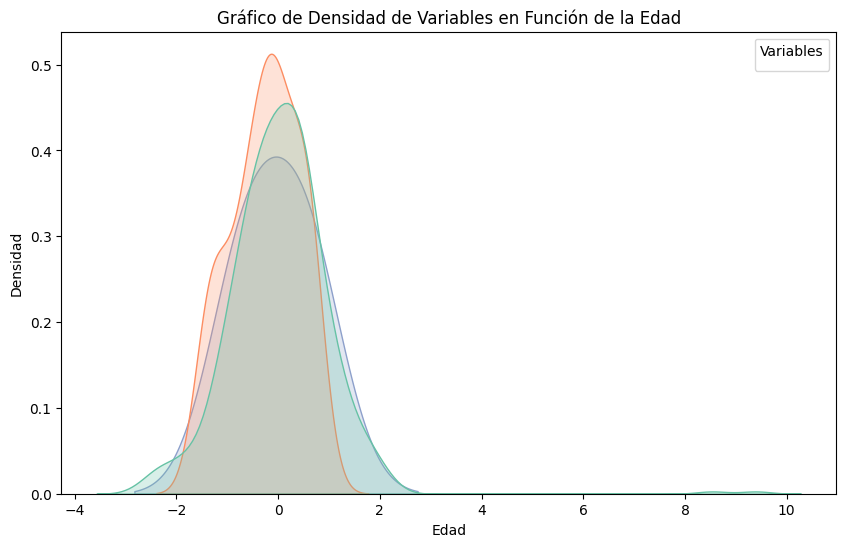

In [22]:
%matplotlib inline
# Filtrar el DataFrame para obtener columnas relevantes
df_primer_grupo = transformed_df[['edad', 'biopsias_previas_NO', 'biopsias_previas_SI', 'biopsias_previas_nan']]


df_primer_grupo['variable'] = df_primer_grupo[['biopsias_previas_NO', 'biopsias_previas_SI', 'biopsias_previas_nan']].idxmax(axis=1)

# Gráfico de Densidad
plt.figure(figsize=(10, 6))


sns.kdeplot(data=df_primer_grupo, x='edad', hue='variable', fill=True, common_norm=False, palette="Set2")


plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.title("Gráfico de Densidad de Variables en Función de la Edad")
plt.legend(title='Variables')
plt.show()